<a href="https://colab.research.google.com/github/916jun/pdm02/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


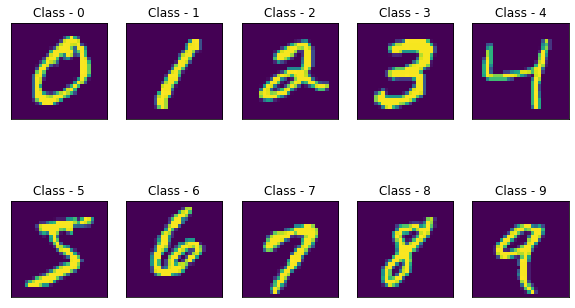

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [8]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
3*3*32+32

320

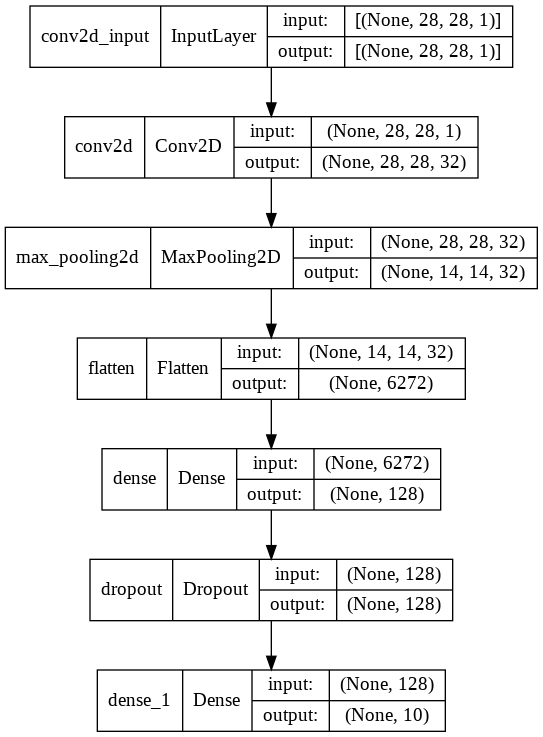

In [10]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [11]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 14s 8ms/step - loss: 0.2418 - accuracy: 0.9289 - val_loss: 0.0767 - val_accuracy: 0.9754
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0818 - accuracy: 0.9759 - val_loss: 0.0557 - val_accuracy: 0.9818
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0449 - val_accuracy: 0.9845
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0378 - val_accuracy: 0.9870
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0415 - val_accuracy: 0.9865
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0388 - val_accuracy: 0.9871
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0352 - val_accuracy: 0.9884
Epoch

In [12]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9890


[0.04475710168480873, 0.9890000224113464]

---

## **CNN1 + FCN3**

In [13]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [14]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [15]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [16]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2418 - accuracy: 0.9268
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0743 - accuracy: 0.9776
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0296 - accuracy: 0.9903
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0223 - accuracy: 0.9925
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0128 - accuracy: 0.9959

In [17]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9887


[0.057480573654174805, 0.9886999726295471]

## **CNN2 + FCN2**

In [55]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [45]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),        
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),                               
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [46]:
c2f2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [47]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2206 - accuracy: 0.9332
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0658 - accuracy: 0.9797
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0460 - accuracy: 0.9861
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0303 - accuracy: 0.9899
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0169 - accuracy: 0.9943
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0144 - accuracy: 0.9952

In [48]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0236 - accuracy: 0.9928


[0.023640824481844902, 0.9927999973297119]

## **CNN2 + FCN3**

In [23]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [24]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),        
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),                               
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [25]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [26]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3020 - accuracy: 0.9066
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0892 - accuracy: 0.9737
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0632 - accuracy: 0.9822
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0508 - accuracy: 0.9850
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0420 - accuracy: 0.9871
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0355 - accuracy: 0.9900
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0224 - accuracy: 0.9933

In [43]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0272 - accuracy: 0.9923


[0.02721036970615387, 0.9922999739646912]

In [28]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9887


[0.057480573654174805, 0.9886999726295471]

In [29]:
c1f2.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9890


[0.04475710168480873, 0.9890000224113464]

# **[DIY] Hidden layer에 따른 정확도**

In [49]:
# Try another method!!
cnn_result = [[0.04475710168480873, 0.9890000224113464], 
 [0.057480573654174805, 0.9886999726295471], 
 [0.023640824481844902, 0.9927999973297119], 
 [0.02721036970615387, 0.9922999739646912]]

In [50]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9890000224113464,
 0.9886999726295471,
 0.9927999973297119,
 0.9922999739646912]

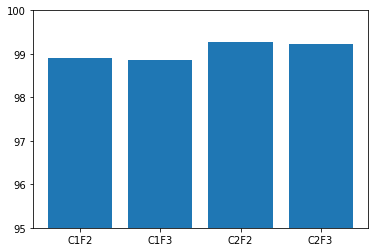

In [51]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim(95,100)
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [61]:
c2f2.save('c2f2_best.hdf5')

In [62]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9933


[0.0389644131064415, 0.9933000206947327]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [63]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))    #무작위 수로 초기화(seed) 후 다시 로딩 후 실행해야함

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0393 - val_accuracy: 0.9933
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0387 - val_accuracy: 0.9937
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0405 - val_accuracy: 0.9929
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0404 - val_accuracy: 0.9927
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0394 - val_accuracy: 0.9928
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0436 - val_accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0476 - val_accuracy: 0.9924
Epo

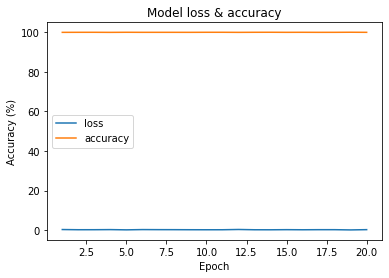

In [64]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

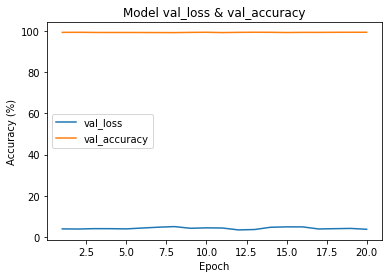

In [65]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

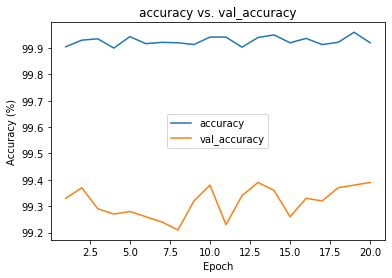

In [66]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here! cf2f3 초기화 후 다시 실행

In [67]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [68]:
# Code here!
hist = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))


Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0309 - val_accuracy: 0.9922
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0326 - val_accuracy: 0.9920
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0378 - val_accuracy: 0.9918
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0310 - val_accuracy: 0.9930
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0321 - val_accuracy: 0.9924
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0324 - val_accuracy: 0.9922
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0411 - val_accuracy: 0.9920


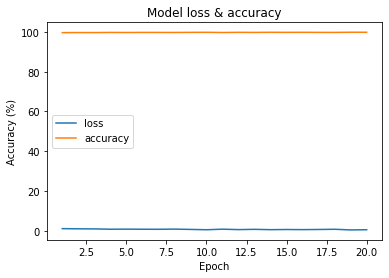

In [69]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

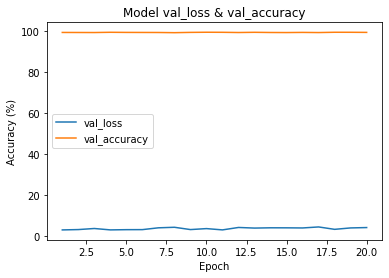

In [70]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

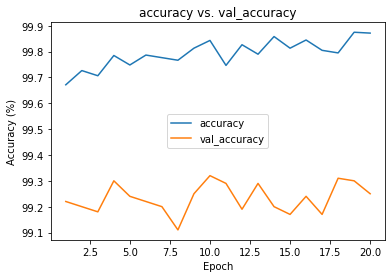

In [71]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')